In [1]:
# xmlrpc_client.ipynb

import xmlrpc
import pickle

import cv2
import pandas as pd
from datetime import datetime
import os

In [2]:
server = xmlrpc.client.ServerProxy("http://localhost:8008")

In [28]:
start_time = datetime(year=2024, month=11, day=7, hour=12, minute=0, second=0) 
end_time = datetime(year=2024, month=11, day=7, hour=12, minute=30, second=0)
datetime_format = "%Y-%m-%d %H:%M:%S"

stats_server = xmlrpc.client.ServerProxy("http://localhost:8018")
filter_log = stats_server.load_log(start_time.strftime(datetime_format), end_time.strftime(datetime_format), "ping")
filter_log = pickle.loads(filter_log.data)
display(filter_log)

type             datetime
2   ping  2024-11-07 12:04:58
13  ping  2024-11-07 12:08:07
24  ping  2024-11-07 12:11:55

In [19]:
print('Ping:', server.ping())

print('Server datetime:', server.now())

print('View, type, value:', server.type(2))
print('View, type, value:', server.type(2.))
print('View, type, value:', server.type('My string'))
print('View, type, value:', server.type("My string"))
print('View, type, value:', server.type([1,2,3]))
print('View, type, value:', server.type(["one", "two", "three"]))
print('View, type, value:', server.type((1,2,"3")))

print('Sum 2 + 3 :', server.sum(2, 3))
print('Pow 2^3: ', server.pow(2, 3))

Ping: True
Server datetime: 20241107T18:48:44
View, type, value: ['2', "<class 'int'>", 2]
View, type, value: ['2.0', "<class 'float'>", 2.0]
View, type, value: ['My string', "<class 'str'>", 'My string']
View, type, value: ['My string', "<class 'str'>", 'My string']
View, type, value: ['[1, 2, 3]', "<class 'list'>", [1, 2, 3]]
View, type, value: ["['one', 'two', 'three']", "<class 'list'>", ['one', 'two', 'three']]
View, type, value: ["[1, 2, '3']", "<class 'list'>", [1, 2, '3']]
Sum 2 + 3 : 5
Pow 2^3:  8


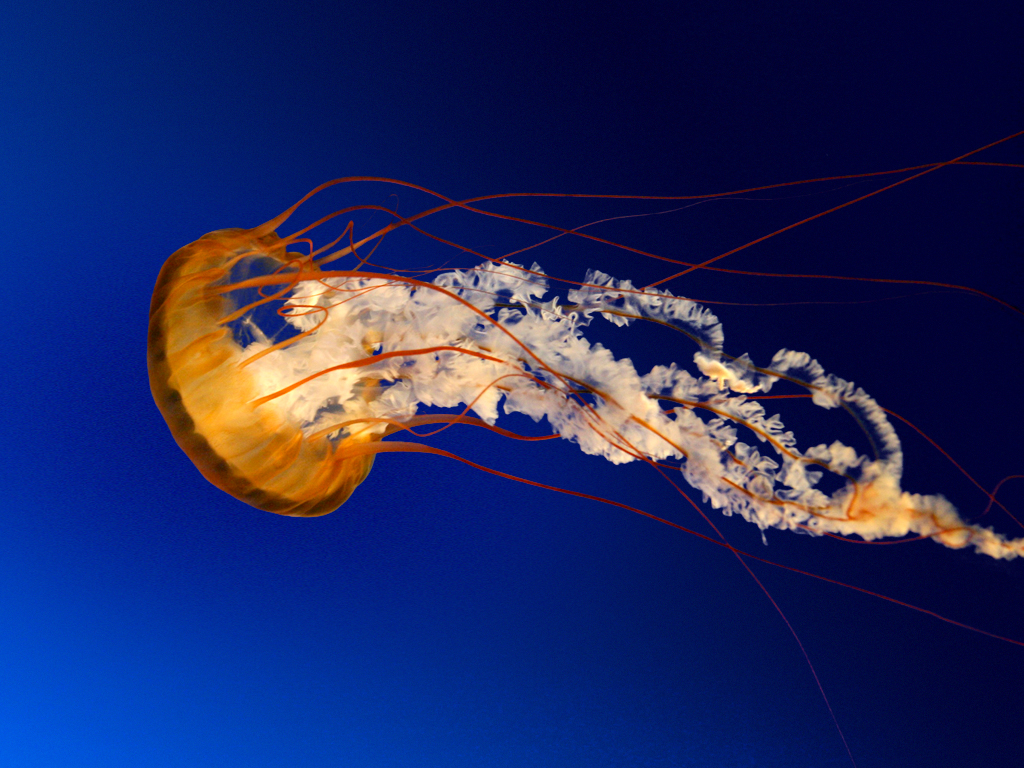

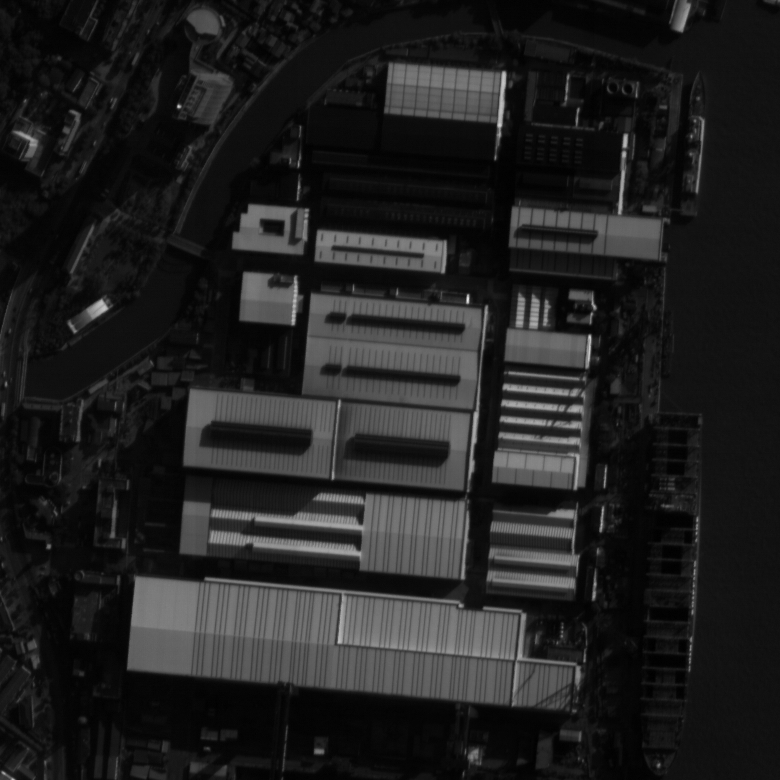

In [20]:
from PIL import Image # Работа с изображением
import matplotlib.pyplot # Отображение
import numpy as np

import xmlrpc

# Режим отображения внутри ноутбука
%matplotlib inline

img = Image.open("Jellyfish.jpg")
img_mono = Image.open("11.bmp")
img_array = np.array(img)
img_mono_array = np.array(img_mono)
# Исходное изображение
display(Image.fromarray(img_array))
display(img_mono)

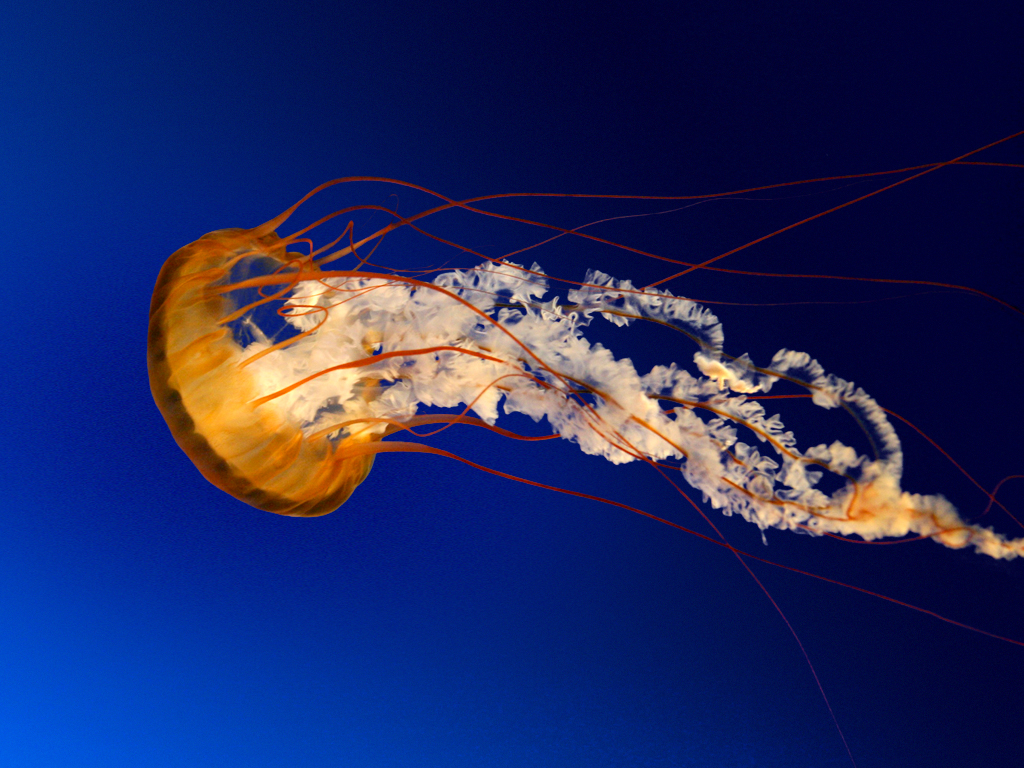

In [59]:
import xmlrpc.client
# Тест бинарной передачи данных
#pimg = img_arr.dumps()
pimg = pickle.dumps(img_array) # универсально
img_bin = xmlrpc.client.Binary(pimg)

img_bin2 = server.send_back_binary(img_bin)

#img_arr2 = np.loads(img_bin2.data)
img_arr2 = pickle.loads(img_bin2.data) # универсально

# Изображение после возрата с сервера
display(Image.fromarray(img_arr2))

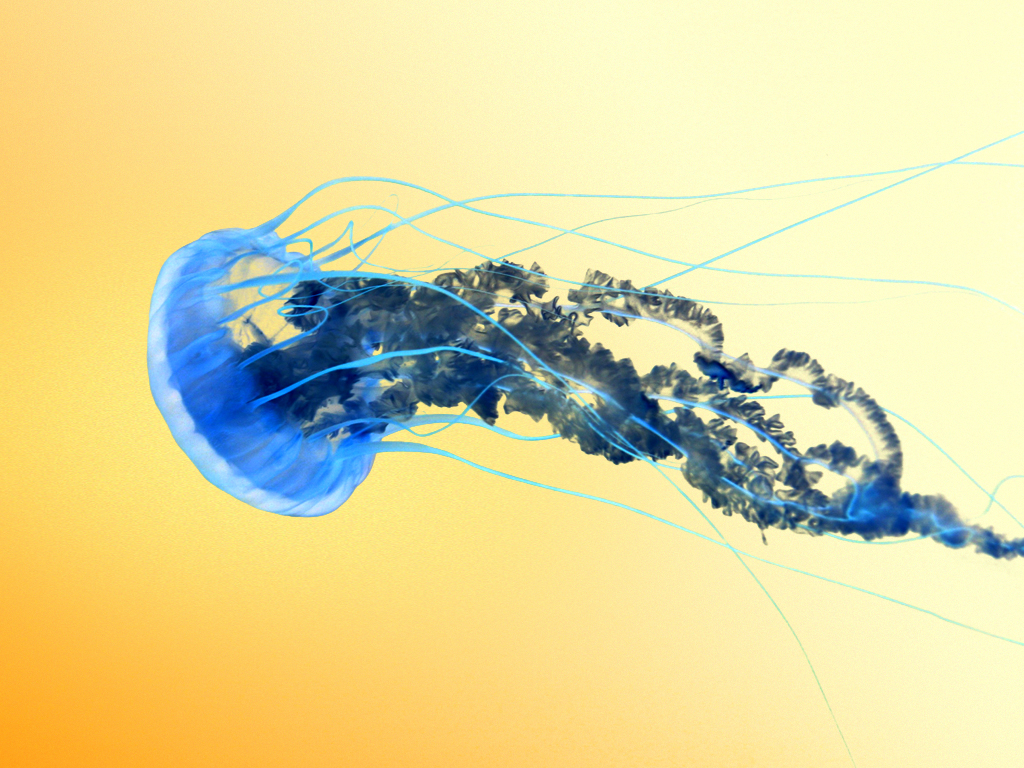

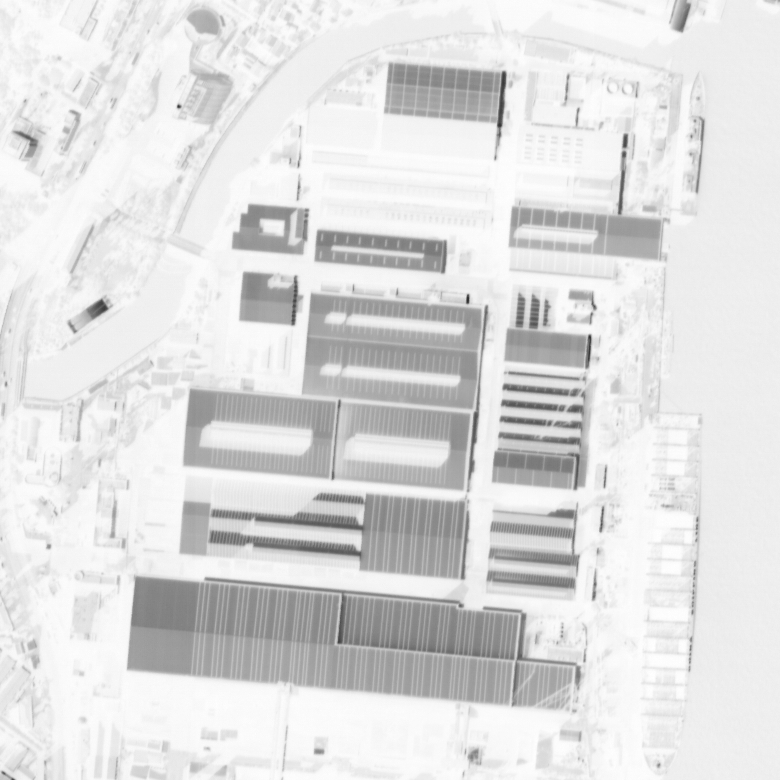

In [21]:
# Инверсия цвета изображения через сервер
def inv_color(img_arr_in):
    pimg = pickle.dumps(img_arr_in)
    img_bin = xmlrpc.client.Binary(pimg)
    img_bin2 = server.color_inversion(img_bin)
    img_arr_out = pickle.loads(img_bin2.data)
    return img_arr_out

img_arr_inv = inv_color(img_array)
display(Image.fromarray(img_arr_inv))
img_mono_arr_inv = inv_color(img_mono_array)
display(Image.fromarray(img_mono_arr_inv))

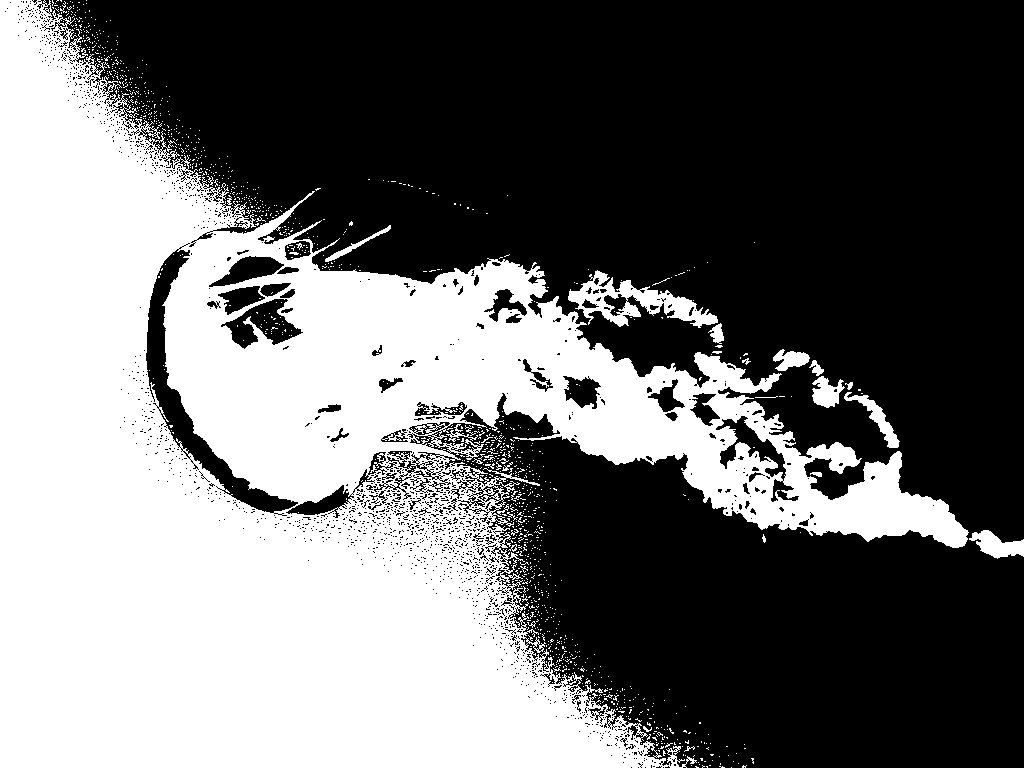

In [23]:
# Бинаризация изображения через сервер по порогу
def bin_color(img_arr_in, value):
    pimg = pickle.dumps(img_arr_in)
    img_bin = xmlrpc.client.Binary(pimg)
    img_bin2 = server.binarization_func(img_bin, value)
    img_arr_out = pickle.loads(img_bin2.data)
    return img_arr_out

img_arr_bin_color = bin_color(img_array, 120)
display(Image.fromarray(img_arr_bin_color))

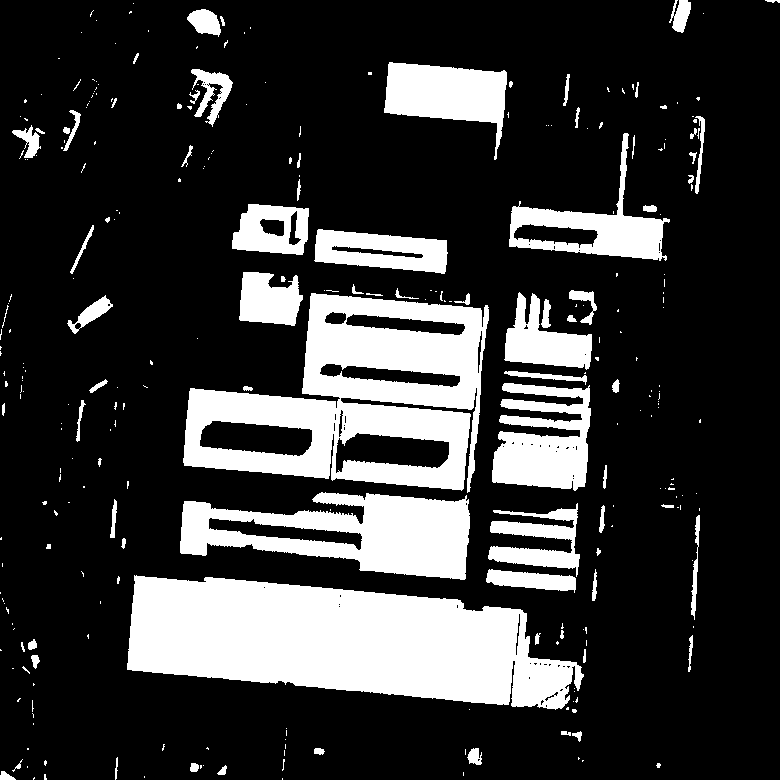

In [24]:
img_mono_arr_bin_color = bin_color(img_mono_array, 50)
display(Image.fromarray(img_mono_arr_bin_color))

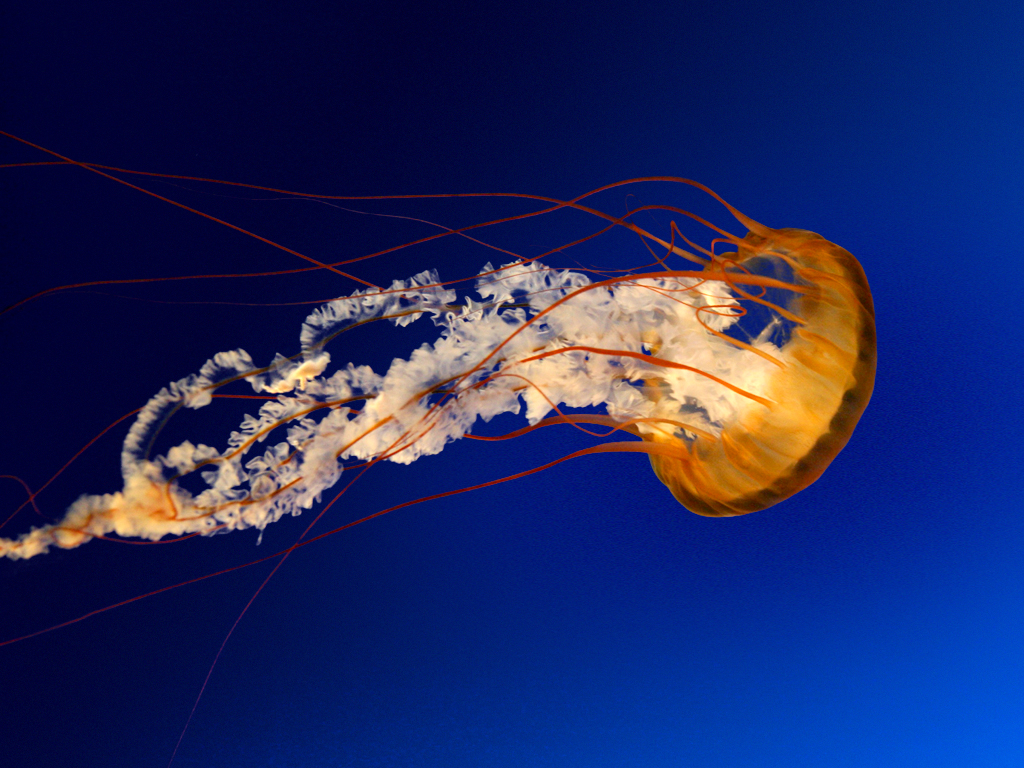

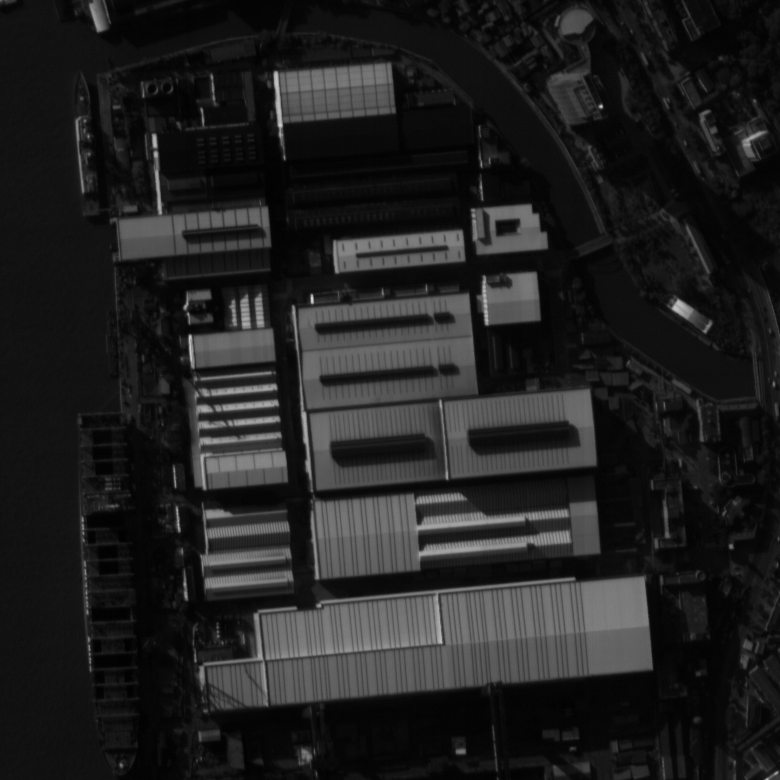

In [25]:
# Поворот изображения по вертикали
def flip_vertical(img_arr_in):
    pimg = pickle.dumps(img_arr_in)
    img_bin = xmlrpc.client.Binary(pimg)
    img_bin2 = server.flip_vertical(img_bin)
    img_arr_out = pickle.loads(img_bin2.data)
    return img_arr_out

img_arr_flip = flip_vertical(img_array)
display(Image.fromarray(img_arr_flip))
img_mono_arr_flip = flip_vertical(img_mono_array)
display(Image.fromarray(img_mono_arr_flip))

In [29]:
print(server.black_list_check(u'Петров'))
print(server.black_list_check(u'Примеров'))


Петров: bad_boy
Примеров: good_boy


In [30]:
print(server.black_list_check_fio_with_birthday('Петров', 'Петр', 'Петрович', '07.08.1985'))
# Меняем фамилию
print(server.black_list_check_fio_with_birthday('Иванов', 'Петр', 'Петрович', '07.08.1985'))
# Меняем имя
print(server.black_list_check_fio_with_birthday('Петров', 'Михаил', 'Петрович', '07.08.1985'))
# Меняем отчество
print(server.black_list_check_fio_with_birthday('Петров', 'Петр', 'Александрович', '07.08.1985'))
# Меняем дату рождения
print(server.black_list_check_fio_with_birthday('Петров', 'Петр', 'Петрович', '05.03.1995'))

Петров Петр Петрович (07.08.1985): bad_boy
Иванов Петр Петрович (07.08.1985): good_boy
Петров Михаил Петрович (07.08.1985): good_boy
Петров Петр Александрович (07.08.1985): good_boy
Петров Петр Петрович (05.03.1995): good_boy
